# Signal Processing Intro
## For the Interns
But not Aron he should know this by now

# What is a Signal?
- A function that:
    - "…conveys information about the behavior or attributes of some phenomenon."
    - "…is an observable change in a quantifiable entity."
    - "…is the observation of the output of a system."
- Typically a function of time, but not always
- Examples:
    - Changing air pressure (sound)
    - Temperature
    - Stock price
    - Electric quantities
        - Voltage
        - Current
        - Power

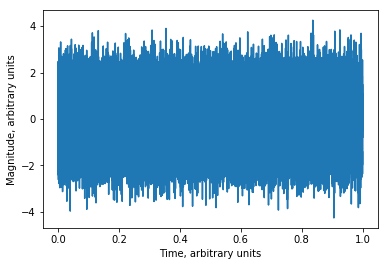

In [1]:
import numpy as np
import matplotlib.pyplot as plt

fs = 100*10**3
t = np.arange(start=0, stop=1, step=1.0/fs)
y = np.random.normal(size=t.shape)

%matplotlib inline
plt.figure()
plt.plot(t, y)
plt.xlabel("Time, arbitrary units")
plt.ylabel("Magnitude, arbitrary units")
plt.show()

# Analog and Digital (and Discrete)
- Analog
    - Continous in time (or whatever it is a function of)
    - Continouse in value
    - Represented as: $f(t)$
- Digital
    - Discrete in time
    - Discrete in value
    - What is in computers
    - Represented as $x[n]$
- Discrete
    - Discrete in time
    - Continous in value
    - Used in sample and hold circuits
    - Typically an intermediary when converting from Analog and Digital

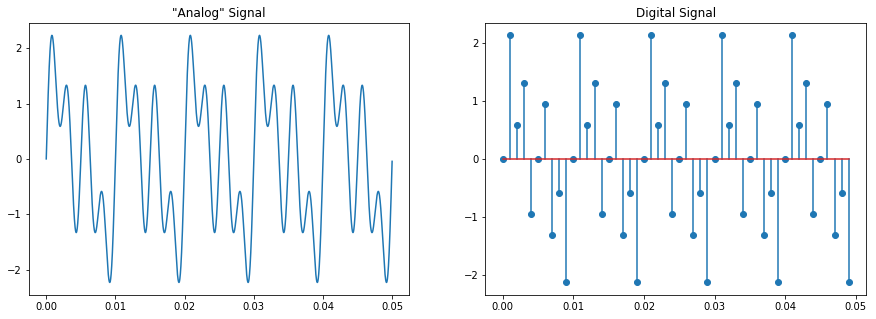

In [2]:
STOP = 0.05
w = 2*np.pi
fs = 100*10**3
t = np.arange(start=0, stop=STOP, step=1.0/fs)
fs_digi = fs*0.01
t_digi = np.arange(start=0, stop=STOP, step=1.0/fs_digi)
analog = np.sin(100*w*t) + np.sin(200*w*t) + np.sin(400*w*t)
digital = np.sin(100*w*t_digi) + np.sin(200*w*t_digi) + np.sin(400*w*t_digi)


f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,5))
ax1.plot(t, analog)
ax1.set_title("\"Analog\" Signal")

ax2.stem(t_digi, digital)
ax2.set_title("Digital Signal")
plt.show()

# Bits and Signal to Noise Ratio
- Discrete representation of a signal quantizes it
- These are encoded as "bits"
- Greater bit depth means more precision in your measurement (all else being equal)

## Given a system capable of sampling at only 2 discrete values, 0 and 1, how would the value 0.5 be encoded?
- This can be probabalistically modeled
- Essentially just "noise"

## The ratio of Signal to Noise is known as the SNR
- Bandwidth can be traded for better SNR (sort of)
    - This is achieved through methods such as averaging or Sigma-Delta
    - This is the principle of operation behind some Analog to Digital Converters
- SNR can be traded for better bandwidth (again, sort of)
- A high SNR ADC won't immediately remove noise from an inherently noisy system!

## Analog signals have a SNR, which can be quantified as an "Equivalent Number of Bits", or ENOB
- Additionally, bit depth isn't always a measure of ENOB. A 24 bit ADC may only have an ENOB of 20 bits.
- Amusingly, the ENOB can have fractional bits (e.g. 10.5 bits)

In [3]:
import scipy.signal as sig
def gen_interpolation_example():
    STOP = 0.2
    w = 2*np.pi
    fs = 200*10**3
    t = np.arange(start=0, stop=STOP, step=1.0/fs)

    fs_digi = 20
    freq_digi = 10
    t_digi = np.arange(start=0, stop=STOP+0.05, step=1.0/fs_digi)
    digi_sig = np.cos(w*freq_digi*t_digi)
    fig = plt.figure(figsize=(20,10))
    ax0 = fig.add_subplot(221)
    ax0.set_xlim(xmin=-0.01, xmax=0.21)
    ax0.stem(t_digi, digi_sig)
    ax0.set_title("Sampled signal")

    saw_frq = 10
    sawtooth = -sig.sawtooth(w*saw_frq*t, width=0.5)
    ax1 = fig.add_subplot(222)
    ax1.set_xlim(xmin=-0.01, xmax=0.21)
    ax1.plot(t, sawtooth)
    ax1.stem(t_digi, digi_sig)
    ax1.set_title("Linear Interpolation")

    t = np.arange(start=0, stop=STOP+0.001, step=1.0/fs)
    cos_sig = np.cos(w*freq_digi*t)
    ax2 = fig.add_subplot(223)
    ax2.set_xlim(xmin=-0.01, xmax=0.21)
    ax2.plot(t, cos_sig)
    ax2.stem(t_digi, digi_sig)
    ax2.set_title("Sinusoidal Interpolation")

    sqr = sig.square(w*freq_digi*t)
    ax3 = fig.add_subplot(224)
    ax3.set_xlim(xmin=-0.01, xmax=0.21)
    ax3.plot(t, sqr)
    ax3.stem(t_digi, digi_sig)
    ax3.set_title("Piecewise interpolation")


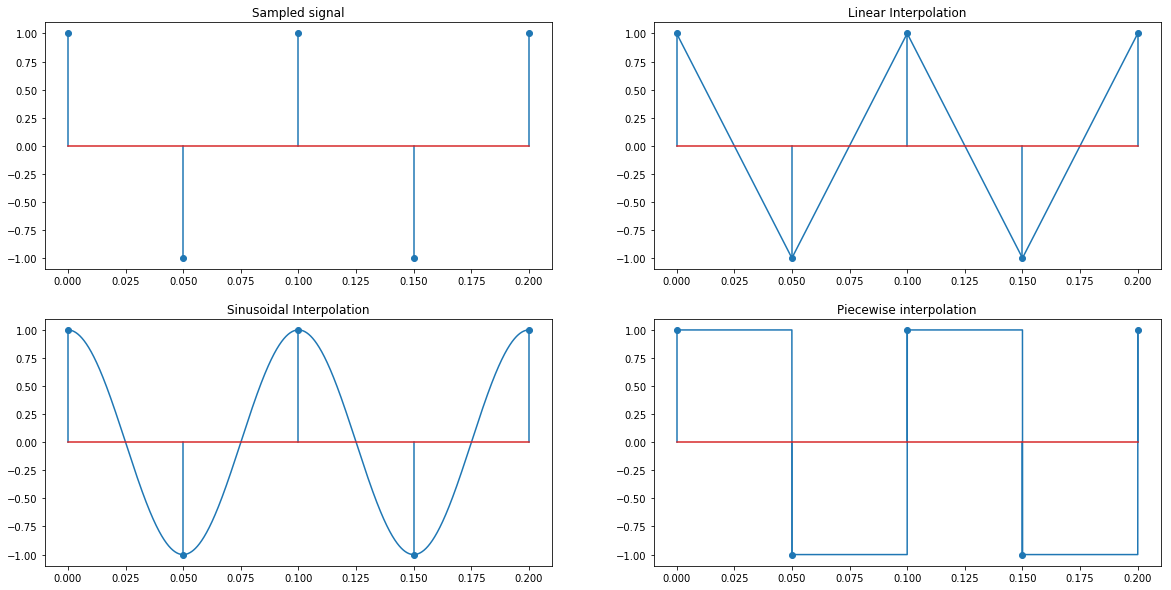

In [4]:
gen_interpolation_example()

# Nyquist-Shannon Theorem
- Provides a lower limit on how fast is "fast enough."
- Prevents "Aliasing"
    - It becomes impossible to distinguish between DC and a signal at the Nyquist Frequency
    - Signals at a frequency higher than the Nyquist Frequency are "aliased" into the sampled signal, "wrapping" up from 0
    - This can be exploited to sample high frequency, narrow band signals at a lower data rate
- This is the __BARE__ minimum to reconstruct a __periodic__ signal
    - Not uncommon to sample much faster for easier transformability, etc.
    - An imperfect signal may drift slightly above/below Nyquist limit
    - If transients are shorter than the reciprocal of your sampling frequency, they can be missed
        - This is why products like the T400L sample at 1MHz when the grid operates at 60Hz

In [5]:
# Examples of aliasing
def gen_aliasing_example():
    fs_limited = 1000
    fs_full = fs_limited*10
    t_limited = np.arange(start=0, stop=0.01, step=1.0/fs_limited)
    t_full = np.arange(start=0, stop=0.01, step=1.0/fs_full)
    w = 2*np.pi
    dc_limited = np.sin(0*w*t_limited)
    dc_full = np.sin(0*w*t_full)
    nyquist_limited = np.sin((fs_limited/2.0)*w*t_limited)
    nyquist_full = np.sin((fs_limited/2.0)*w*t_full)

    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(221)
    ax1.set_ylim(ymin=-1.1, ymax=1.1)
    ax1.stem(t_limited, dc_limited)
    ax1.plot(t_limited, nyquist_limited)
    ax1.set_title("Nyquist Boundary, fs=1000, f_sig=500")

    ax2 = fig.add_subplot(222)
    ax2.set_ylim(ymin=-1.1, ymax=1.1)
    ax2.plot(t_full, dc_full)
    ax2.stem(t_full, nyquist_full)
    ax2.set_title("Faster Sampling, fs=10000, f_sig=500")

    # Aliasing "wraparound"
    f_wrap = 750
    f_band = 250
    sig_wrap = np.sin(f_wrap*w*t_limited)
    sig_band = np.sin(f_band*w*t_limited)
    ax3 = fig.add_subplot(223)
    ax3.set_ylim(ymin=-1.1, ymax=1.1)
    ax3.stem(t_limited, sig_band, "b", markerfmt="bo", label="In band")
    ax3.stem(t_limited, sig_wrap, "g", markerfmt="go", label="Aliased")
    ax3.legend()
    title_string = "Aliased signal, fs=1000, f_sig=250 and 750\n"
    title_string += "Note the aliased signal is inverted."
    ax3.set_title(title_string)


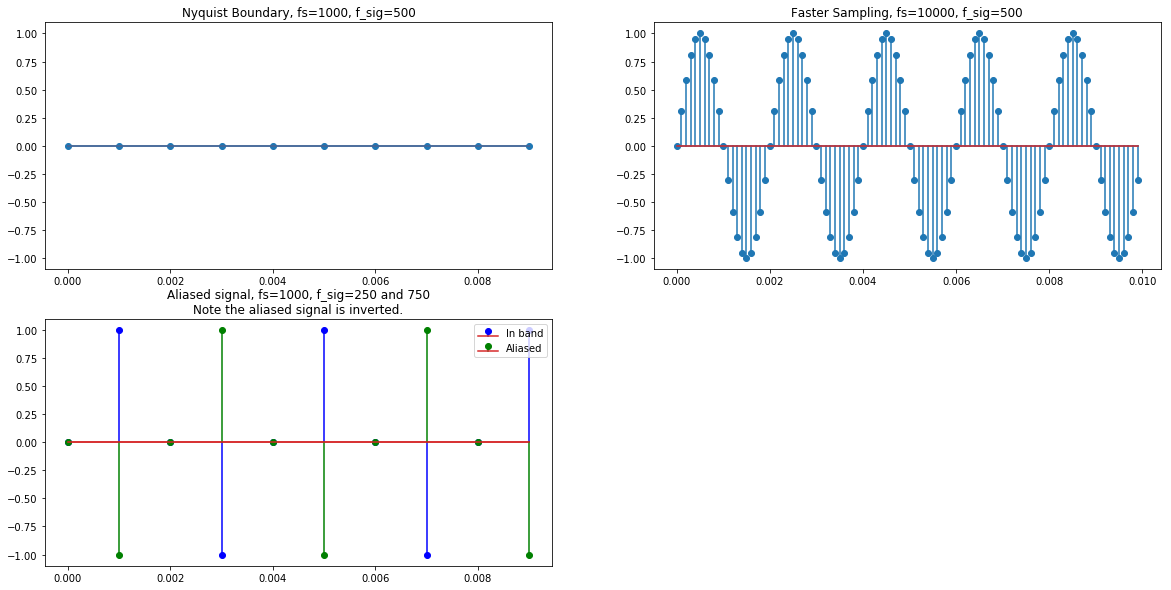

In [6]:
gen_aliasing_example()

# "An analog signal can be perfectly reconstructed from its sampled form if the sampling rate is greater than twice the bandwidth of the signal."

# Fourier Series
## Any periodic signal can be represented as the infinite sum of sines and cosines.
$$f(x)=\frac{1}{2}a_{0}+\sum_{n=0}^\infty a_{n}cos(nx) +\sum_{n=0}^\infty a_{n}sin(nx)$$

## If we were to construct a signal, we can select the frequency and amplitudes of the component signals to create a seemingly non-sinusoidal signal.

### Square Wave
$$f(x) = \frac{4}{\pi}\sum_{n=1,3,5...}^\infty \frac{1}{n}sin(\frac{n\pi x}{L})$$ where $2L$ is the period of the square wave.


In [7]:
def generate_square_example():
    # Constants
    fs = 100*10**3
    fundamental = 1
    w = 2*np.pi
    t = np.arange(start=0, stop=1, step=1.0/fs)

    # Square wave
    coeff = [1, 3, 5, 7, 9, 11]
    def square_gen(n, freq, time): 
        T = 1.0/freq
        L = T/2
        y=np.zeros_like(time)
        for i in range(n):
            if i == 0:
                continue
            if i%2 == 0:
                continue
            y = np.add(y, ((4.0/np.pi) * (1.0/i) * np.sin((i*np.pi*time)/L)))

        return y

    sigs = [square_gen(i, fundamental, t) for i in coeff]
    fig = plt.figure(figsize=(20,10))
    ax0 = fig.add_subplot(211)
    for sqr in sigs:
        ax0.plot(t, sqr)
    ax0.set_title("Summing of sines to produces a square wave")

    # Gibbs Phenomenon
    ax1 = fig.add_subplot(212)
    gibbs = np.sin(0*t)+ 1.1789797
    ax1.plot(t, square_gen(11, fundamental, t), label="11")
    ax1.plot(t, square_gen(50, fundamental, t), label="51")
    ax1.plot(t, square_gen(501, fundamental, t), label="501")
    ax1.plot(t[:t.size//2], gibbs[:t.size//2], label="Gibbs~=1.")
    ax1.legend()

    ax1.set_title("Gibbs Phenomenon\nThe overshoot stays constant")

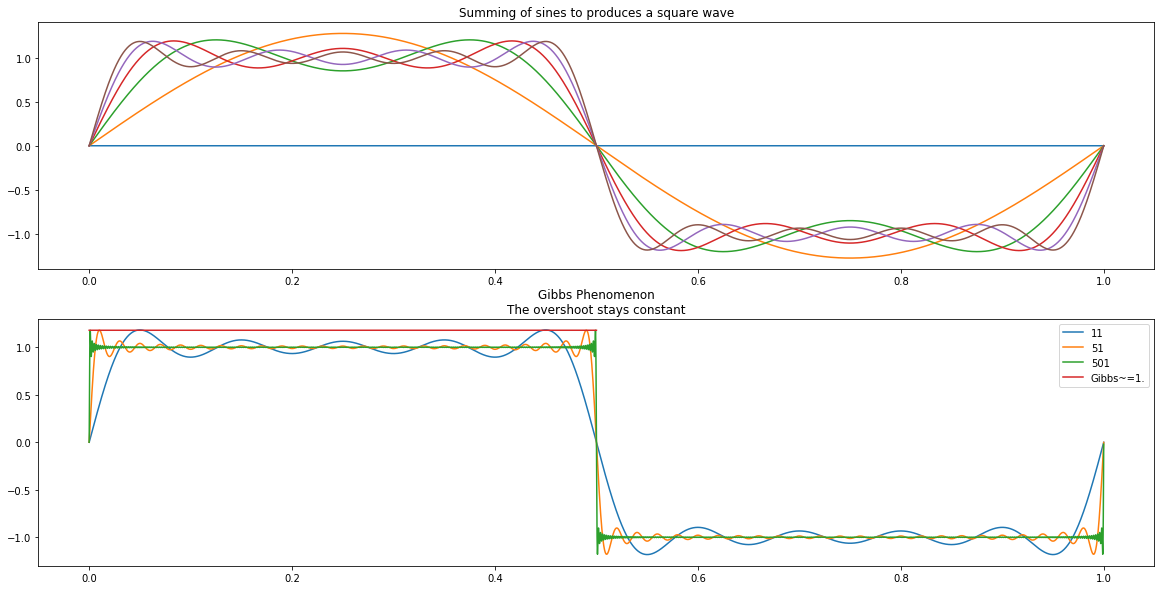

In [8]:
generate_square_example()

# Fourier Transform
Given that any periodic signal can be constructed from the sum of sines and cosines, can the reverse be done?

## Continous
$$F(\omega) = \int_{-\infty}^{\infty}f(x)e^{-2\pi jx\omega}dx$$
and inverse:
$$f(x)=\int_{-\infty}^{\infty}F(\omega)e^{2\pi j x\omega}d\omega$$

where $\omega$ is the frequency in rads/unit (normally seconds if a time series)

## Discrete
$$ X_{k} = \sum_{n=0}^{N-1}{x_n}e^{-\frac{2\pi j}{N}kn} $$
or, as shown above (in trigonometric form):
$$X_{k} = \sum_{n=0}^{N-1}[cos(\frac{2\pi kn}{N}) - j \cdot sin(\frac{2\pi kn}{N})]$$
The inverse can be calculated using the transform as follows:
$$F^{-1}(\{x_n\}) = \frac{F(\{x_{N-n}\})}{N}$$

## Fast Fourier Transform (FFT)
An optimized version of the DFT, improves the speed to compute a normal DFT. The most common is the Cooley-Tukey algorithm, which recursively breaks down a DFT of any composite size into many smaller DFT's. This gives the best performance for radix-2 signals (e.g. length of the signal is $2^n$ where $n \in \mathbb{N}$), but works well for any signal where the length or the factors of its length are not a large prime number.

## What's the transform of a one frequency signal?
Given a signal, $f(t)=cos({\omega_0}t)$, the transform is:
$$F(\omega) = \pi[\delta(\omega - \omega_0) + \delta(\omega + \omega_0)]$$
where $\delta_{ij}$ is the Kronecker delta, for which $\delta_{ij}=1$ if $i=j$ and $\delta_{ij}=0$ elsewhere.

In [20]:
def calc_fft(y, Fs, inc_neg=False):
    Ts = 1.0/Fs
    n = len(y)
    k = np.arange(n)
    T = n/Fs
    frq = k/T
    if not inc_neg:
        frq = frq[range(n//2)]
    else:
        frq = np.fft.fftshift(frq)
        frq = np.subtract(frq, frq[-1])
    Y = np.fft.fft(y)
    if not inc_neg:
        Y = Y[range(n//2)]
    
    Y = np.abs(Y)
    
    return frq, Y

def generate_fft_example():
    fs = 10*10**3
    t = np.arange(start=0, stop=0.1, step=1.0/fs)
    y = np.sin(2*np.pi*100*t)
    frq, Y = calc_fft(y, fs, inc_neg=True)
    # Normalize the magnitude
    Y = np.divide(Y, len(Y))
    fig = plt.figure(figsize=(20,10))
    ax0 = fig.add_subplot(211)
    ax0.set_xlabel("Time")
    ax0.set_ylabel("Magnitude")
    ax0.set_title("Input Signal")
    ax0.plot(t, y)

    ax1 = fig.add_subplot(212)
    ax1.stem(frq, Y)
    ax1.set_xlabel("Frequency")
    ax1.set_ylabel("Magnitude")
    ax1.set_title("FFT")
    plt.show()

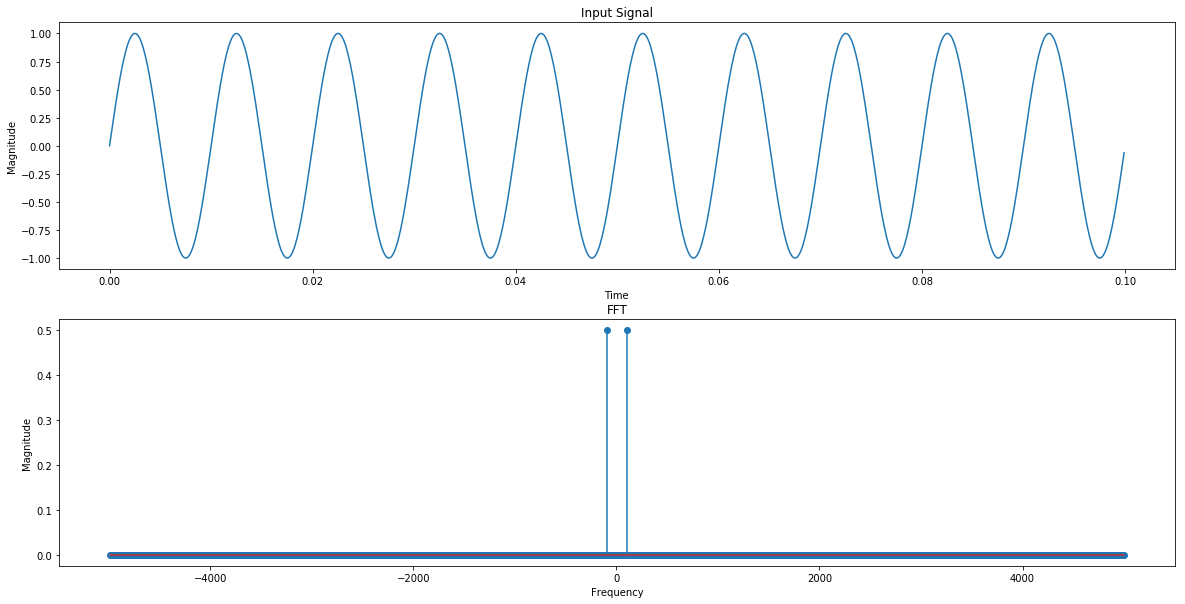

In [21]:
generate_fft_example()

In [11]:
def generate_windowing_example():
    fs = 10*10**3
    t = np.arange(start=0, stop=0.05, step=1.0/fs)
    t_window = np.arange(start=0.0125, stop=0.0275, step=1.0/fs)
    y = np.sin(2*np.pi*100*t)
    y_windowed = np.sin(2*np.pi*100*t_window)

    # Normalize the magnitude
    fig = plt.figure(figsize=(20,10))
    ax0 = fig.add_subplot(221)
    ax0.set_xlabel("Time")
    ax0.set_ylabel("Magnitude")
    ax0.set_title("Input Signal")
    ax0.plot(t, y, label="Signal")
    ax0.plot(t_window, y_windowed, label="Windowed Signal")
    ax0.legend()

    # Full
    frq, Y = calc_fft(y, fs, inc_neg=False)
    Y = np.divide(Y, len(Y))
    ax1 = fig.add_subplot(223)
    ax1.stem(frq, Y)
    ax1.set_xlabel("Frequency")
    ax1.set_ylabel("Magnitude")
    ax1.set_title("FFT, full signal, \"Coherent\" sampling")

    # Windowed, box
    frq_windowed, Y_windowed = calc_fft(y_windowed, fs, inc_neg=False)
    Y_windowed = np.divide(Y_windowed, len(Y_windowed))
    ax2 = fig.add_subplot(224)
    ax2.stem(frq_windowed, Y_windowed)
    ax2.set_xlabel("Frequency")
    ax2.set_ylabel("Magnitude")
    ax2.set_title("FFT, windowed, \"Non-coherent\" sampling")

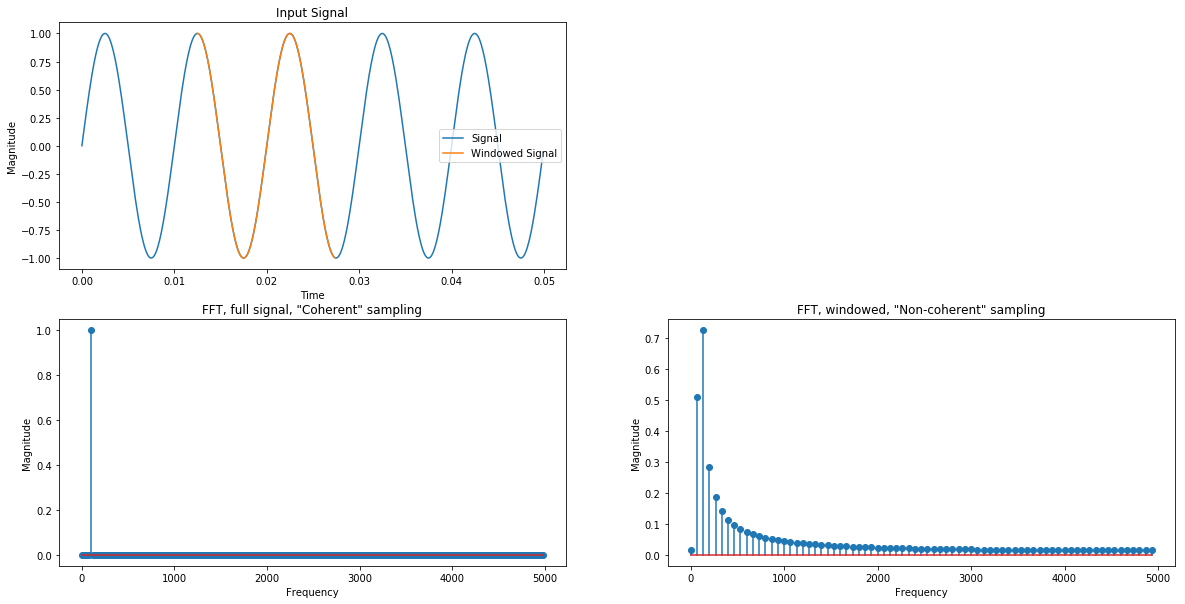

In [12]:
generate_windowing_example()

# Windowing and (Non) Coherent Sampling
## The problem
The Fourier Transform is meant to operate on infinite, periodic signals. The FFT handles this by _assuming_ the given window repeats for infinity. If you are unable to sample coherently (see below), sharp transitions will occur at the edges of the FFT window, which will appear like high frequency content. This is problematic because it will cause spectral leakage.
## Coherent Sampling
If, somehow, you know a priori what your signal of interest is (such as qualifying an analog to digital converter), you can align your FFT window to the zero crossings of the waves. Unfortunately, this isn't always possible (or desirable, even).
## The solution
By using a windowing (or a "tapering") function, we can "force" the ends to zero, removing the sharp transitions that shouldn't be there. This does two things:
- Removes the erroneously calculated high frequency content
- Widens the "lobes" of the FFT, reducing spectral resolution

Generally, the loss in resolution is acceptable.

## Examples
Rather than cludge my way through making these window plots, I'll just link the excellent [Wikipedia Page](https://en.wikipedia.org/wiki/Window_function)

## Trivial Case
It is worth noting that, technically, applying no function to your window is known as the "rectangular" window.

## The Three Considerations

The three biggest considerations when selecting a window are:
- Width of the main lobe
- Magnitude of the side lobes
- How quickly the side lobes fall off

Generally, improving performance in one reduces performance of the others. You can't have a thin main lobe, small side lobes, and highly rapid side lobe tapering (there's no free lunch!)

In [13]:
def other_windowing_example():
    fs = 10*10**3
    t = np.arange(start=0, stop=0.05, step=1.0/fs)
    t_window = np.arange(start=0.0125, stop=0.0275, step=1.0/fs)
    y = np.sin(2*np.pi*100*t)
    y_windowed = np.sin(2*np.pi*100*t_window)

    # Apply a Blackman function
    blackman_window = sig.blackman(y_windowed.size)
    y_blackman = np.multiply(y_windowed, blackman_window)

    # Windowed, box
    frq_rect, Y_rect = calc_fft(y_windowed, fs, inc_neg=False)
    Y_rect = np.divide(Y_rect, len(Y_rect))
    fig = plt.figure(figsize=(20,10))
    ax0 = fig.add_subplot(211)
    ax0.stem(frq_rect, Y_rect)
    ax0.set_xlabel("Frequency")
    ax0.set_ylabel("Magnitude")
    ax0.set_title("FFT, rectangular window")

    frq_black, Y_black = calc_fft(y_blackman, fs, inc_neg=False)
    Y_black = np.divide(Y_black, len(Y_black))
    ax1 = fig.add_subplot(212)
    ax1.stem(frq_black, Y_black)
    ax1.set_xlabel("Frequency")
    ax1.set_ylabel("Magnitude")
    ax1.set_title("FFT, Blackman window")

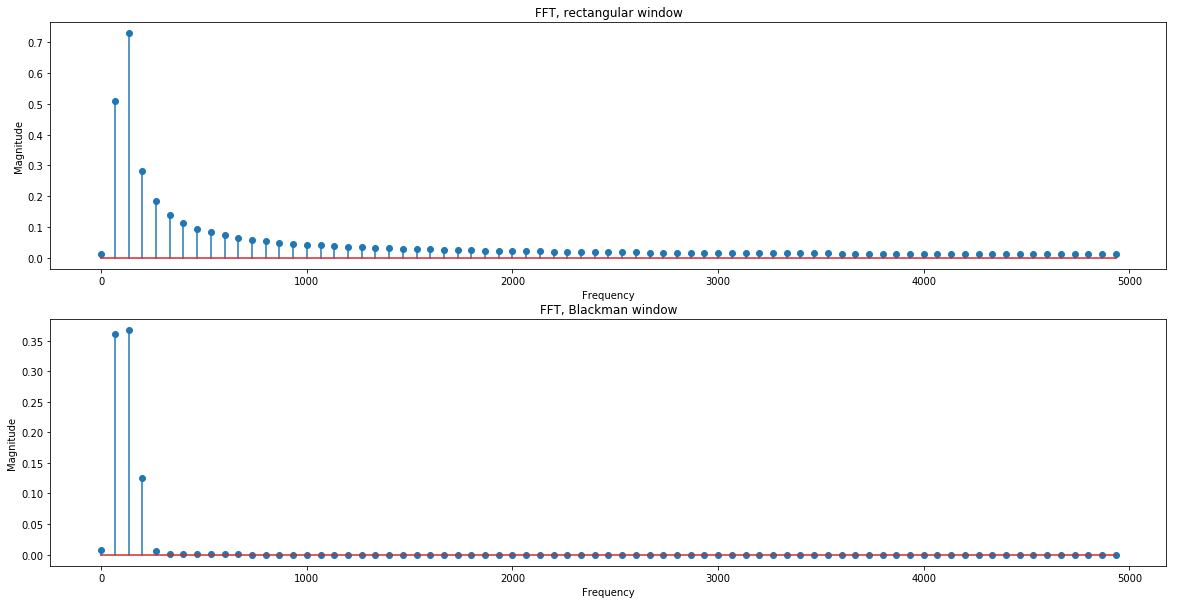

In [14]:
other_windowing_example()

# Getting rid of stuff you don't want
## Motivation
Suppose you building a sound system. You have a 2.1 system -- a pair of normal speakers and a subwoofer. You don't want the midrange and treble content reaching the subwoofer, and don't want the bass reaching the speakers. How can you split the signal?

## Filters
We can filter this content out! There are 4 basic types of filters commonly used:
- Lowpass
- Highpass
- Bandpass
- Bandstop

These do just what their name says. A highpass filter allows "high" frequencies through, rejecting "low" frequencies. A Lowpass filter lets "low" frequencies through, stopping "highs". These terms are relative to the "cutoff" frequency.

In [15]:
def gen_filter_plots():
    b_low, a_low = sig.butter(1, 100, btype="lowpass", analog=True)
    w_low, h_low = sig.freqs(b_low, a_low)

    b_high, a_high = sig.butter(1, 100, btype="highpass", analog=True)
    w_high, h_high = sig.freqs(b_high, a_high)

    b_bp, a_bp = sig.butter(1, [1, 90], btype="bandpass", analog=True)
    w_bp, h_bp = sig.freqs(b_bp, a_bp)

    b_bs, a_bs = sig.butter(1, [1, 90], btype="bandstop", analog=True)
    w_bs, h_bs = sig.freqs(b_bs, a_bs)


    fig = plt.figure(figsize=(15,10))

    ax_low = fig.add_subplot(221, xscale="log", xlabel="Frequency, rads/s", ylabel="Amplitude, dB")
    ax_low.plot(w_low, 20*np.log10(abs(h_low)))
    ax_low.grid(which="both")
    ax_low.axvline(100, color="green")
    ax_low.set_title("Lowpass Filter")

    ax_high = fig.add_subplot(222, xscale="log", xlabel="Frequency, rads/s", ylabel="Amplitude, dB")
    ax_high.plot(w_high, 20*np.log10(abs(h_high)))
    ax_high.grid(which="both")
    ax_high.axvline(100, color="green")
    ax_high.set_title("Highpass Filter")

    ax_bp = fig.add_subplot(223, xscale="log", xlabel="Frequency, rads/s", ylabel="Amplitude, dB")
    ax_bp.plot(w_bp, 20*np.log10(abs(h_bp)))
    ax_bp.grid(which="both")
    ax_bp.axvline(1, color="green")
    ax_bp.axvline(90, color="green")
    ax_bp.set_title("Bandpass Filter")

    ax_bs = fig.add_subplot(224, xscale="log", xlabel="Frequency, rads/s", ylabel="Amplitude, dB")
    ax_bs.plot(w_bs, 20*np.log10(abs(h_bs)))
    ax_bs.grid(which="both")
    ax_bs.axvline(1, color="green")
    ax_bs.axvline(90, color="green")
    ax_bs.set_title("Bandstop Filter")

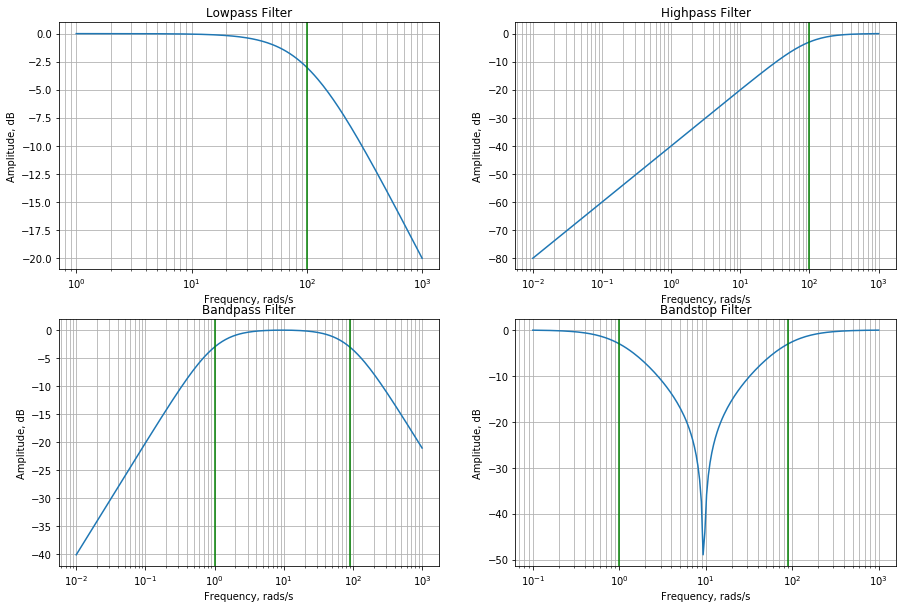

In [16]:
gen_filter_plots()

In [17]:
def butter_highpass(cutoff, Fs, order=4):
    nyq = 0.5*Fs
    normalized_cutoff = cutoff / nyq
    b, a = sig.butter(order, normalized_cutoff, btype="high", analog=False)
    
    return b, a

def butter_hp_filter(data, cutoff, Fs, order=4):
    b, a = butter_highpass(cutoff, Fs, order=order)
    y = sig.lfilter(b, a, data)
    
    return y

In [18]:
def do_filtering():
    fs = 50*10**3
    t = np.arange(start=0.0, stop=0.1, step=1.0/fs)
    w = 2*np.pi

    # Major 60Hz noise
    frequencies = [60, 500, 750, 1000, 2500, 10000, 15000]
    amplitudes = [1, 0.5, 0.3, 1.4, 2.6, 0.8, 0.5]

    total_signal = np.zeros_like(t)
    for component in zip(amplitudes, frequencies):
        tmp = component[0]*np.sin(component[1]*w*t)
        total_signal += tmp

    total_frq, total_mag = calc_fft(total_signal, fs)
    total_mag /= len(total_mag)

    fig = plt.figure(figsize=(20, 10))
    ax0 = fig.add_subplot(411)
    ax0.plot(t, total_signal)
    ax1 = fig.add_subplot(412)
    ax1.stem(total_frq, total_mag)


    # Now filter it, use a 4th order Butterworth filter

    filtered_signal = butter_hp_filter(total_signal, 100.0, fs)
    filtered_frq, filtered_mag = calc_fft(filtered_signal, fs)
    filtered_mag /= len(filtered_mag)

    ax2 = fig.add_subplot(413)
    ax2.plot(t, filtered_signal)
    ax3 = fig.add_subplot(414)
    ax3.stem(filtered_frq, filtered_mag)

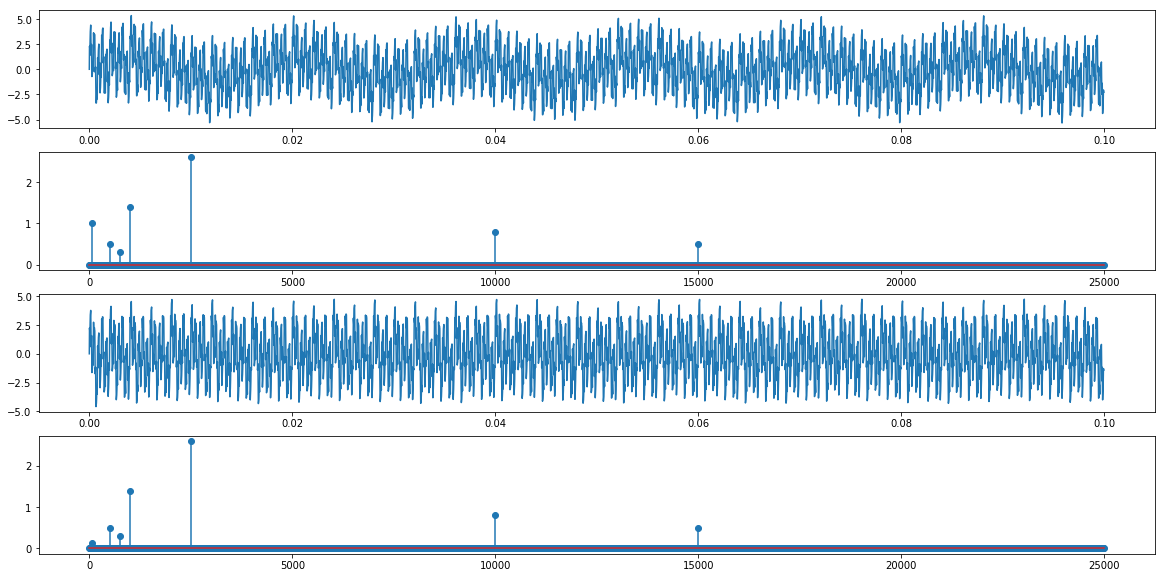

In [19]:
do_filtering()

# Errata

## Temporal vs. Spectral resolution with FFT
FFT's gain greater spectral resolution the longer the window of the FFT, but in doing so lose temporal resolution.

Suppose we have 2 signals, one at 100Hz and one at 200Hz, both with magnitudes such that their energy for a whole window would equal 1. The first signal starts at $t=0$, and runs for half the length of the window. At the halfway point, it stops and the second signal starts. We take an FFT of the window -- it will only tell us that, for the length of the whole window, a 100Hz signal and a 200Hz signal were present, each with an energy of 0.5. It __does not__ tell us when they started, how long they ran, what their actual magnitudes were, etc. _But_, suppose the signals were at 100 and 101Hz. If the window is of sufficient length, it would be able to distinguish between them rather than lumping them together.

Conversely, running a shorter window to gain better temporal resolution will increase the widths of the FFT bins. A signal at 100Hz and a signal at 101Hz may be lumped into the same bin of 95-105Hz, but the FFT would better distinguish between a signal starting at $t=0$ and $t=T_w$, where $T_w$ is the length of the window.

## LTI systems
It is also worth noting that many of the techniques only work when we can assume what we are modeling is a __Linear, Time-Invariant System__, or an __"LTI"__. These adhere to several properties.

### Superposition (Linearity)
Suppose we have a system (such as a filter) and a set of inputs. Let us pass the each individual signal through the system and sum their respsective outputs, and call this $Y_{Summed Outputs}$. Then, let us sum each input signal together and pass this sum through the system, and call the output $Y_{Summed Inputs}$. A system is __linear__ if:
$$Y_{Summed Ouptuts} = Y_{Summed Inputs}$$


In a linear system, the magnitude of the frequency components may change, but the frequencies present will not.

Conversely, a system is __nonlinear__ if this does not hold. The magnitude of your frequency components may change, but so may the frequencies present; i.e. a pure 100Hz signal, passed through a non-linear system may have an output containing 100Hz, 200Hz, 300Hz, etc. An example would be an amplifier driven too hard -- the output distorts and may become buzzy and harsh.

### Time Invariance
Suppose we have a system (again, such as a filter) and an input. Let us pass the signal through the system at $t=0$ and record the output $Y_{t=0}$. Then, at some time later, $t=T$, let us pass the same signal through and record the output $Y_{t=T}$. A system is said to be __time invariant__ if:
$$Y_{t=0} = Y_{t=T}$$

Conversely, a __time-variant__ system is one where this principle does not hold. An example would be a dynamic range compressor, where the gain applied to an input depends on the magnitude of prior inputs. Or, a filter where the cutoff frequency varies as a function of time (such as those used to create the "wobbling" bass effect in dubstep).